# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [55]:
import pandas as pd
import numpy as np

In [56]:
import random, string

N = 10
country = [ ''.join(random.sample( string.ascii_uppercase, 3)) for _ in range(N)]
population = np.random.randint( 0, 100000, N) 

In [57]:
data = {'國家': country ,
        '人口': population}
df = pd.DataFrame(data)
df

,國家,人口
0,OFN,59280
1,KNA,5057
2,JUD,35226
3,BZJ,65839
4,SZH,7303
5,LXG,23503
6,DTJ,97100
7,JWU,35192
8,PSA,40982
9,VAQ,91331


In [58]:
df.set_index('國家')['人口'].idxmax()

'DTJ'

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [5]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [52]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [53]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [54]:
arrange_data = [ line.split("\t") for line in data]
arrange_data[:5]    

[['n00015388_157',
  'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
 ['n00015388_238',
  'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'],
 ['n00015388_304',
  'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'],
 ['n00015388_327',
  'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'],
 ['n00015388_355',
  'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']]

## 將 txt 轉成 pandas dataframe

In [9]:
import pandas as pd
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

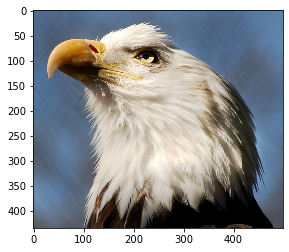

In [10]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0][1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
#img = np.array(img)
plt.imshow(img)
plt.show()

In [11]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        response = requests.get(url)
        if response.status_code == requests.codes.ok:
            print(url)
            img_list.append(Image.open(BytesIO(response.content)))
    return img_list

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
Total images that we got: 4 


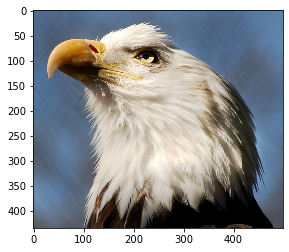

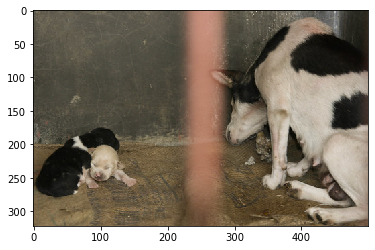

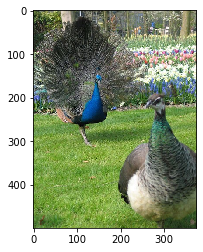

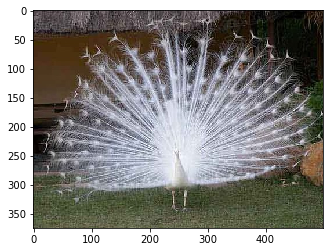

In [12]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()